# Objective

The objective of this notebook is to improve the Olivetti code (made during Centennial College) that it's uploaded on the College repository. In this way I can keep on practicing and performing better work and self-improvement.

When uploading the 2 codes I notice, I could improve some more that work. More classifiers can be used to perform accuracy test and create a comparison between accuracies of models before applying PCA and after.

This new code will be a mix of the existing code with some new approaches.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imshow
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
data = np.load("olivetti_faces.npy")
target = np.load("olivetti_faces_target.npy")

## Checking the shape of the dataset imported

In [3]:
print("Data:", data.shape)
print("Target:", target.shape)

Data: (400, 64, 64)
Target: (400,)


## Displaying some of the pictures

Here will be displayed the first 20 pictures of the dataset, which means only 2 subjects will appear on this display.

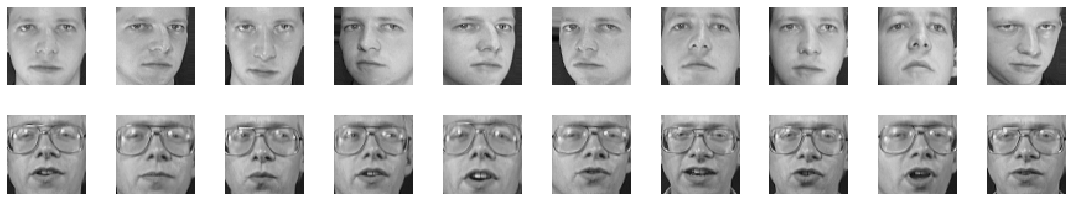

In [4]:
display = 20
plt.figure(figsize=(15,15))
for i in range(display):
    plt.subplot(10,10,i+1)
    x=data[i]
    imshow(x)
    plt.axis('off')
plt.show()

Visualizing how many subjects there are on the dataset and displaying 1 picture of each.

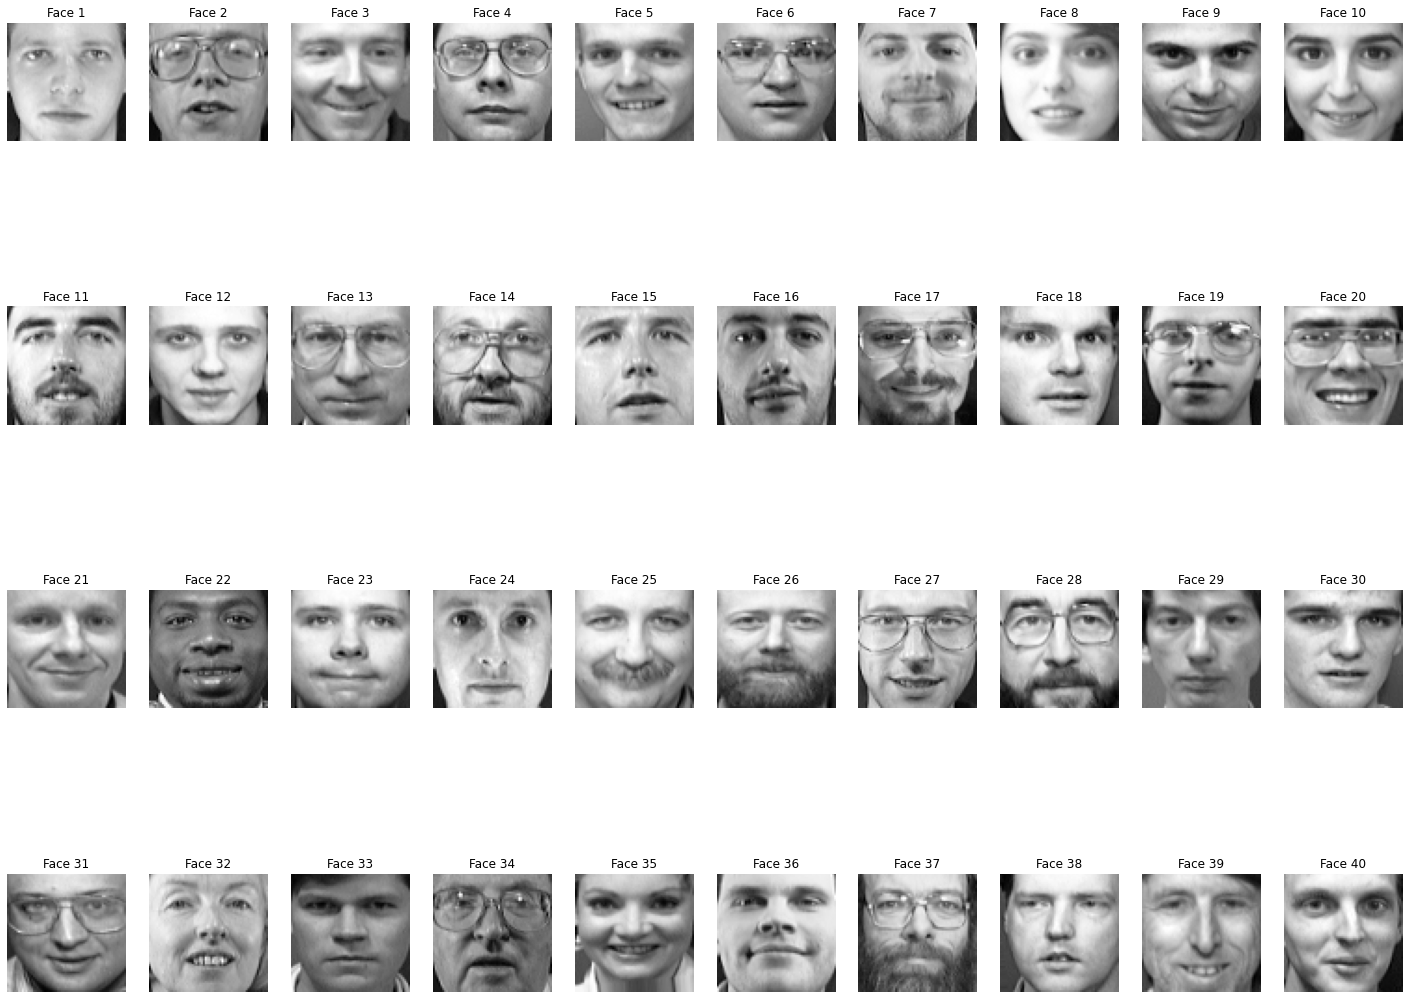

In [5]:
fig = plt.figure(figsize=(25,20))
for i in range(1, 10 * 4 + 1):
    img = data[10*(i-1),:,:]
    fig.add_subplot(4,10,i)
    plt.imshow(img, cmap=('gray'))
    plt.title("Face {}".format(i))
    plt.axis('off')
plt.show()

## Preprocessing of the data

- Splitting the data into X and Y to further be applied into Machine Learning process. 

Following the classifiers available to use towards data, those are the ones that will be used on this enhancing code project. 

- KNN
- Logistic Regression
- Naive Bayes
- Decision Tree
- SVM
- Random Forest Classifier

All these classifiers will be tested before applying PCA and after to compare the accuracy and verify if there was any improvement when reducing the high-dimensional data.

In [6]:
X = data.reshape(data.shape[0],data.shape[1]*data.shape[2])
y = target.reshape(-1,1)

print("X shape:", X.shape)
print("Y shape:", y.shape)

X shape: (400, 4096)
Y shape: (400, 1)


## Splitting the data 

Now splitting the data into train and test to apply Machine learning towards it. 

In [12]:
# Splitting data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Since the same steps will be made for the each classifier, will create a dictionary having the models and a function to optmize the process and make the code look a little bit more cleaner. 

## Building the Machine Learning Model

In [13]:
# Imports for each classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Importing the model evaluation tools
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score, f1_score, plot_roc_curve

In [14]:
# Creating the dictionary for the models
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
          "SVM": SVC(),
          "Naive Bayes": GaussianNB(),
          "Random Forest": RandomForestClassifier(),
          "Decision Tree": DecisionTreeClassifier()
         }

In [18]:
# Creating the function to fit and score the models
def fit_and_score(models, X_train, y_train, X_test, y_test):
    np.random.seed(42)
    models_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        models_scores[name] = model.score(X_test, y_test)
    return models_scores

Model dicitionar created with all the classifiers that are going to be used.

Function created to fit and score each model and append to a new dictionary (models_scores) 

Now append each model with the function and verify it's score and visualize it graphicaly.

In [31]:
# Appending each model with the function
models_scores = fit_and_score(models=models, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

# Checking the accuracy of each model
models_scores

{'Logistic Regression': 0.9625,
 'KNN': 0.8625,
 'SVM': 0.925,
 'Naive Bayes': 0.8375,
 'Random Forest': 0.95,
 'Decision Tree': 0.475}

By visualizing the scores of each model, we can see that Logistic Regression performed the best on the accuracy compared to the other models followed close by Random Forest and SVM.

- Next step will be to perform a Hyperparameter tunning on the 5 models and compare the results and decide which one gave a better result.

- Decision Tree will be disconsidered since it did not reach 50% of accuracy during the first attempt

A easier way to visualize will be turning into a graph.

# Model Comparison 

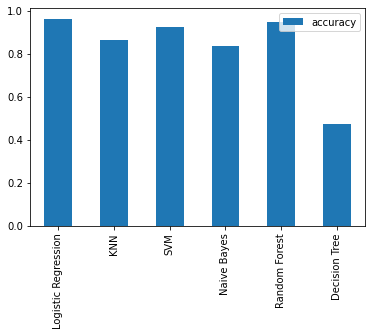

In [34]:
model_compare = pd.DataFrame(models_scores, index=["accuracy"])
model_compare.T.plot.bar();

# Hyperparameter Tunning

For this part will use RandomizedSearchCV and Randomized and GridSearchCV

A list will be created to store the new values of the hyperparameter tunning

## Randomized Search

- Creating the hyperaparameters for each classifier

In [38]:
lr_grid = {"C": np.logspace(-5,5,30),
          "solver":["liblinear","lbfgs","saga"]}

# Tuning models with Randomized SearchCV
## Logistic Regression

In [42]:
searchcv_lr = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=lr_grid,
                                cv = 5,
                                n_iter=10,
                                 verbose=True)
searchcv_lr.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


KeyboardInterrupt: 